[**Demo %s**](#demo-tensorprod-diff)

We define a function and, for reference, its two exact partial derivatives.

In [9]:
u = @(x, y) sin(pi * x .* y - y);
du_dx = @(x, y) pi * y .* cos(pi * x .* y - y);
du_dy = @(x, y) (pi * x - 1) .* cos(pi * x .* y - y);

We will use an equispaced grid and second-order finite differences as implemented by `diffmat2`. First, we have a look at a plots of the exact partial derivatives.

In [10]:
m = 80;  [x, Dx] = diffmat2(m, [0, 2]);
n = 60;  [y, Dy] = diffmat2(n, [1, 4]);
[mtx, X, Y] = tensorgrid(x, y);
U = mtx(u);
dU_dX = mtx(du_dx);
dU_dY = mtx(du_dy);

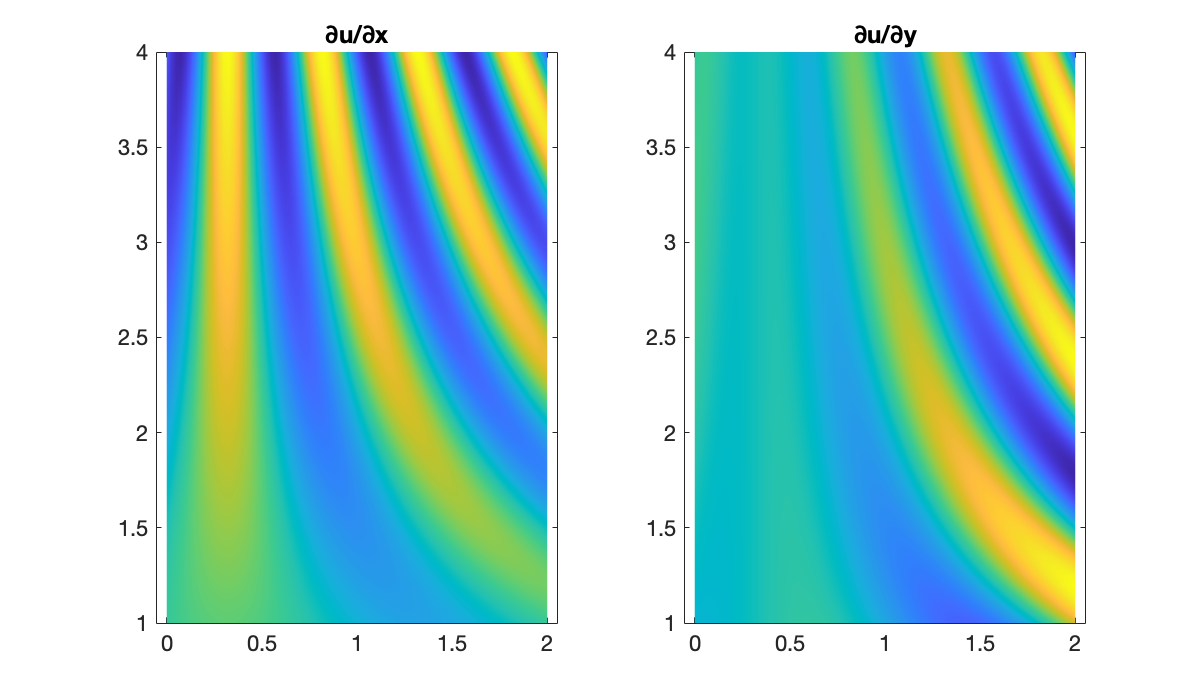

In [11]:
clf,  subplot(1, 2, 1)
pcolor(X', Y', dU_dX')
axis equal,  shading interp
title('∂u/∂x')
subplot(1, 2, 2)
pcolor(X', Y', dU_dY')
axis equal,  shading interp
title('∂u/∂y')

Now we compare the exact partial derivatives with their finite-difference approximations. Since these are signed errors, we use a colormap that is symmetric around zero.

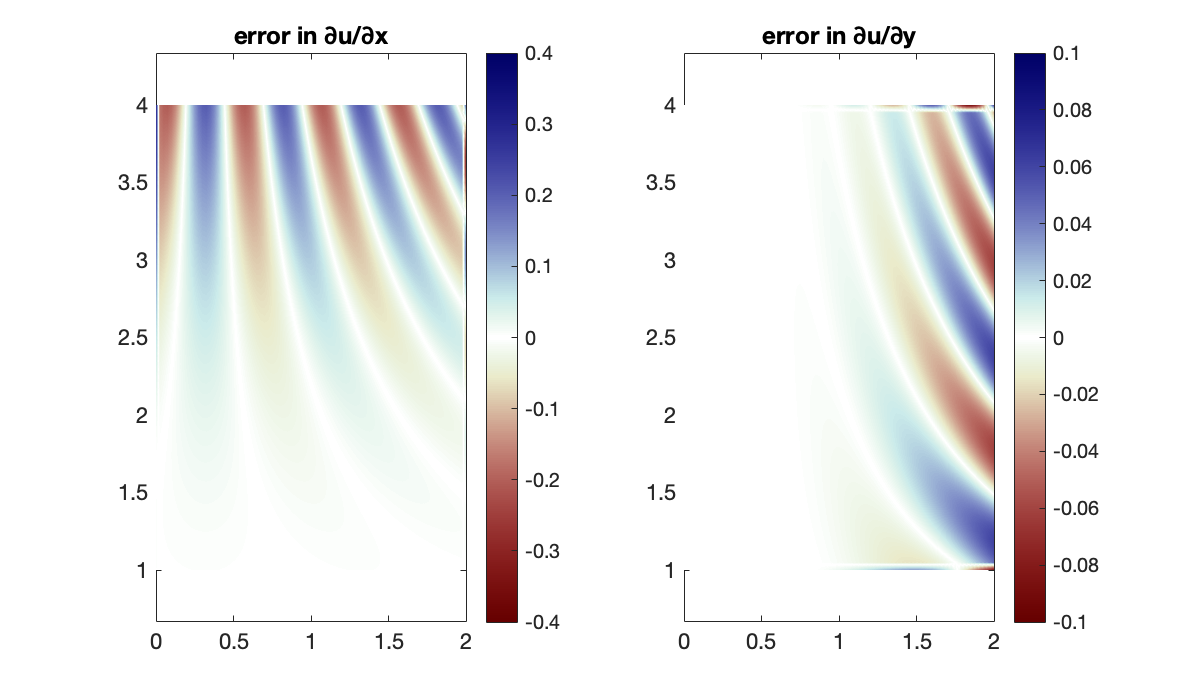

In [12]:
err = dU_dX - Dx * U;
subplot(1, 2, 1)
pcolor(X', Y', err')
colorbar,  clim([-.4, .4])
axis equal,  shading interp
title('error in ∂u/∂x')

err = dU_dY - U * Dy';
subplot(1,2,2)
pcolor(X', Y', err')
colorbar,  clim([-.1, .1])
axis equal,  shading interp
colormap(redsblues)
title('error in ∂u/∂y')

Not surprisingly, the errors are largest where the derivatives themselves are largest.